# Lesson 11
Grab data from multiple excel files and merge them into a single data frame
This is about merging data sets in python


In [1]:
import pandas as pd
import sys 
import os
import matplotlib
%matplotlib inline

In [2]:
print("Python version"+sys.version)
print("Pandas Version" +pd.__version__)
print("Matplotlib"+matplotlib.__version__)

Python version3.6.3 |Anaconda custom (64-bit)| (default, Nov  8 2017, 18:10:31) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas Version0.21.0
Matplotlib2.1.0


# Create 3 excel files



In [3]:
d={'Channel':[1],'Number':[255]}
df=pd.DataFrame(d)
df

,Channel,Number
0,1,255


In [4]:
#export to excel
df.to_excel("test1.xlsx",sheet_name="test1",index=False)
df.to_excel("test2.xlsx",sheet_name="test2",index=False)
df.to_excel("test3.xlsx",sheet_name="test3",index=False)
print("done")

done


# Place all three excel files into a data frame

In [6]:
#List to hold file name
FileNames=[]
os.chdir(r"/Users/shengyuchen/Dropbox/Engagement - Business/My Hub/AI:ML:DL Playground/Pandas Tutorial/Merging files")

for files in os.listdir("."):
    if files.endswith(".xlsx"):
        FileNames.append(files)

FileNames

['test3.xlsx', 'test2.xlsx', 'test1.xlsx']

In [12]:
#Creating a function to process all of the excel files

def GetFile(fnumber):
    Location=r"/Users/shengyuchen/Dropbox/Engagement - Business/My Hub/AI:ML:DL Playground/Pandas Tutorial/Merging files/" +fnumber

    #Parsing the excel file
    #0=first sheet
    df=pd.read_excel(Location,0)
    
    df['File']=fnumber
    return df.set_index(['File'])

In [14]:
#Create a list of dataframes
df_list=[GetFile(fname)for fname in FileNames]

df_list

[            Channel  Number
 File                       
 test3.xlsx        1     255,             Channel  Number
 File                       
 test2.xlsx        1     255,             Channel  Number
 File                       
 test1.xlsx        1     255]

In [22]:
big_df=pd.concat(df_list)
big_df

,Channel,Number
File,,
test3.xlsx,1,255
test2.xlsx,1,255
test1.xlsx,1,255


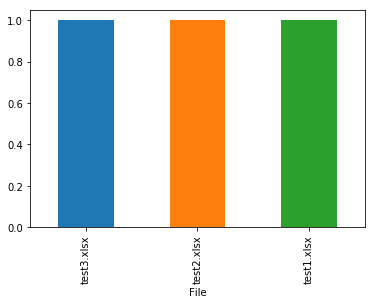

In [38]:
big_df["Channel"].plot.bar()